In [ ]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

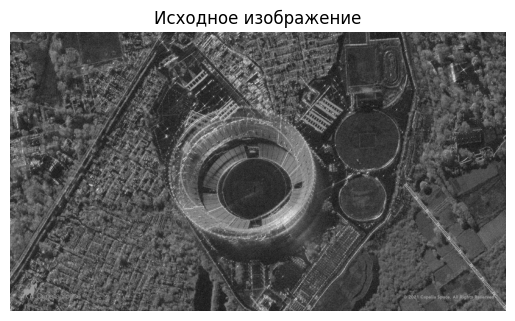

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

img = cv2.imread("sar_1.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Исходное изображение")
plt.axis("off")
plt.show()

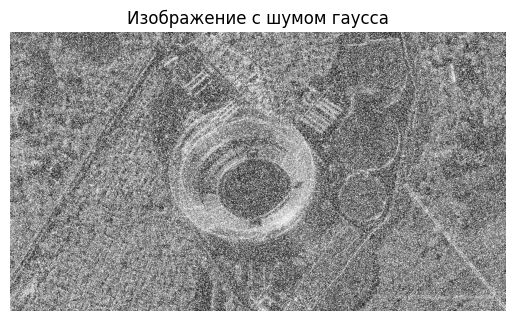

In [ ]:
# Шум гаусса
mean = 0
stddev = 200
noise_gauss = np.zeros(img.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

gauss_noisy = cv2.add(img, noise_gauss)

plt.imshow(gauss_noisy, cmap="gray")
plt.title("Изображение с шумом гаусса")
plt.axis("off")
plt.show()

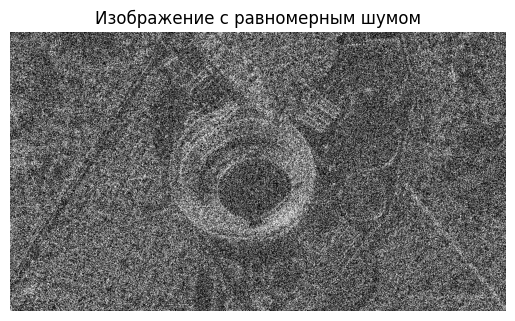

In [23]:
# Равномерный шум
def add_uniform_noise(image, amount=200):
    noise = np.random.uniform(-amount, amount, image.shape)
    noisy = image + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

uniform_noisy = add_uniform_noise(img)
plt.imshow(uniform_noisy, cmap='gray')
plt.title("Изображение с равномерным шумом")
plt.axis("off")
plt.show()

In [ ]:
# Фильтры 
def median_f(image, k=3):
    return cv2.medianBlur(image, k)

def gaussian_f(image, k=5, sigma=1.5):
    return cv2.GaussianBlur(image, (k, k), sigma)

def bilateral_f(image, d=9, sig_c=75, sig_s=75):
    return cv2.bilateralFilter(image, d, sig_c, sig_s)

def nlm_f(image, h=15):
    return cv2.fastNlMeansDenoising(image, h=h)

filters = {
    "Median": median_f,
    "Gaussian": gaussian_f,
    "Bilateral": bilateral_f,
    "NLM": nlm_f
}

results_gauss = {}
results_uniform = {}

for name, f in filters.items():
    results_gauss[name] = f(gauss_noisy)
    results_uniform[name] = f(uniform_noisy)

def evaluate(original, filtered):
    return (
        mean_squared_error(original, filtered),
        ssim(original, filtered)
    )

print("\nРЕЗУЛЬТАТЫ ФИЛЬТРАЦИИ ГАУССОВСКОГО ШУМА")
for name, img_f in results_gauss.items():
    mse_v, ssim_v = evaluate(img, img_f)
    print(f"{name}: MSE={mse_v:.2f}, SSIM={ssim_v:.3f}")

print("\nРЕЗУЛЬТАТЫ ФИЛЬТРАЦИИ РАВНОМЕРНОГО ШУМА")
for name, img_f in results_uniform.items():
    mse_v, ssim_v = evaluate(img, img_f)
    print(f"{name}: MSE={mse_v:.2f}, SSIM={ssim_v:.3f}")


РЕЗУЛЬТАТЫ ФИЛЬТРАЦИИ ГАУССОВСКОГО ШУМА
Median: MSE=171.46, SSIM=0.684
Gaussian: MSE=171.27, SSIM=0.676
Bilateral: MSE=199.41, SSIM=0.608
NLM: MSE=180.85, SSIM=0.716

РЕЗУЛЬТАТЫ ФИЛЬТРАЦИИ РАВНОМЕРНОГО ШУМА
Median: MSE=3125.25, SSIM=0.125
Gaussian: MSE=999.86, SSIM=0.305
Bilateral: MSE=4864.93, SSIM=0.081
NLM: MSE=8412.39, SSIM=0.057


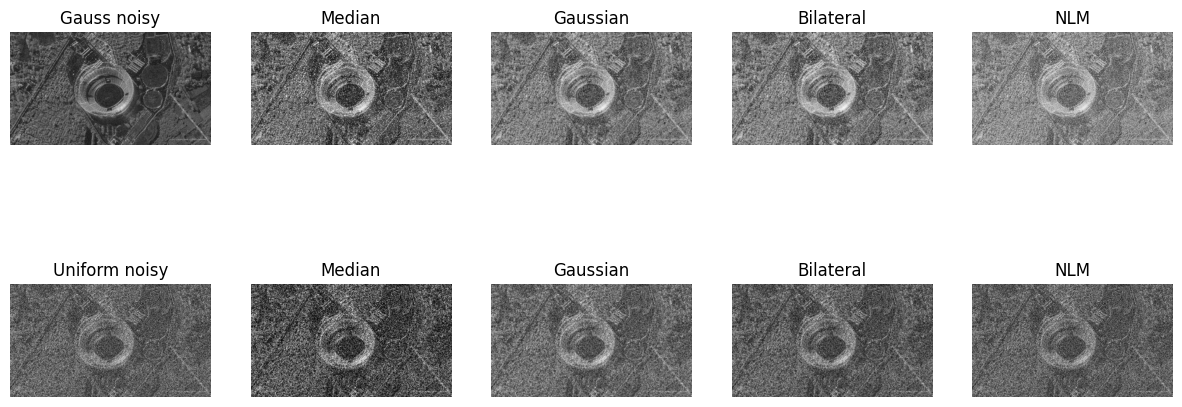

In [19]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

axs[0,0].imshow(gauss_noisy, cmap="gray"); axs[0,0].set_title("Gauss noisy")
axs[1,0].imshow(uniform_noisy, cmap="gray"); axs[1,0].set_title("Uniform noisy")

i = 1
for name, f in filters.items():
    axs[0,i].imshow(results_gauss[name], cmap='gray')
    axs[0,i].set_title(name)
    axs[1,i].imshow(results_uniform[name], cmap='gray')
    axs[1,i].set_title(name)
    i += 1

for ax in axs.ravel():
    ax.axis("off")

plt.show()